In [197]:
# import dependencies
import pandas as pd
import random
import statistics
import numpy
import requests
import time
import matplotlib.pyplot as plt

# import api key
from config import key

my_symbols = ['AAPL', 'TSLA', 'FB', 'MSFT', 'NVDA']
#local_time = time.localtime()
#date = time.strftime("%Y-%m-%d", local_time)
date = '2022-04-12'

In [198]:
base_url = 'https://api.polygon.io/v1/open-close/'

In [199]:
url_list = []

for symbol in my_symbols:
    url_list.append(f'{base_url}{symbol}/{date}/?adjusted=false&apiKey={key}')

In [200]:
res = []

for url in url_list:
    res.append(requests.get(url).json())

res

[{'status': 'OK',
  'from': '2022-04-12',
  'symbol': 'AAPL',
  'open': 168.02,
  'high': 169.87,
  'low': 166.64,
  'close': 167.66,
  'volume': 79265181,
  'afterHours': 168.5,
  'preMarket': 165},
 {'status': 'OK',
  'from': '2022-04-12',
  'symbol': 'TSLA',
  'open': 997.64,
  'high': 1021.1921,
  'low': 976.6001,
  'close': 986.95,
  'volume': 21992032,
  'afterHours': 991.78,
  'preMarket': 968.33},
 {'status': 'OK',
  'from': '2022-04-12',
  'symbol': 'FB',
  'open': 220.235,
  'high': 222.03,
  'low': 213.13,
  'close': 214.14,
  'volume': 20128827,
  'afterHours': 214.9,
  'preMarket': 216.51},
 {'status': 'OK',
  'from': '2022-04-12',
  'symbol': 'MSFT',
  'open': 289.235,
  'high': 290.739,
  'low': 280.49,
  'close': 282.06,
  'volume': 30966721,
  'afterHours': 283.29,
  'preMarket': 285},
 {'status': 'OK',
  'from': '2022-04-12',
  'symbol': 'NVDA',
  'open': 225.37,
  'high': 227.25,
  'low': 212.8204,
  'close': 215.04,
  'volume': 65771807,
  'afterHours': 215.95,
  'p

In [201]:
# lists that will create the df
stock_close = []
stock_open = []
percent_change = []
stock_symbol = []

In [202]:
for stock_info in res:
    for key, value in stock_info.items():
        if key == 'close':
            stock_close.append(value)
        if key == 'open':
            stock_open.append(value)
        if key == 'symbol':
            stock_symbol.append(value)

In [203]:
i = 0
length = len(stock_close)

while i < length:
    day_dif = stock_close[i] - stock_open[i]
    percent_change.append(day_dif / stock_close[i] * 100)
    
    i+=1

In [204]:
# create a dict
stock_dict = {
    'symbol': stock_symbol,
    'open': stock_open,
    'close': stock_close,
    'percent change': percent_change
}
print(stock_dict)

{'symbol': ['AAPL', 'TSLA', 'FB', 'MSFT', 'NVDA'], 'open': [168.02, 997.64, 220.235, 289.235, 225.37], 'close': [167.66, 986.95, 214.14, 282.06, 215.04], 'percent change': [-0.2147202672074518, -1.0831349105831036, -2.846268796114704, -2.5437850102815043, -4.803757440476197]}


In [205]:
# create a dataframe with all of this info
my_stocks_df = pd.DataFrame(stock_dict)
my_stocks_df

,symbol,open,close,percent change
0,AAPL,168.020,167.66,-0.214720
1,TSLA,997.640,986.95,-1.083135
2,FB,220.235,214.14,-2.846269
3,MSFT,289.235,282.06,-2.543785
4,NVDA,225.370,215.04,-4.803757


In [206]:
# print the df
print(my_stocks_df)

  symbol     open   close  percent change
0   AAPL  168.020  167.66       -0.214720
1   TSLA  997.640  986.95       -1.083135
2     FB  220.235  214.14       -2.846269
3   MSFT  289.235  282.06       -2.543785
4   NVDA  225.370  215.04       -4.803757


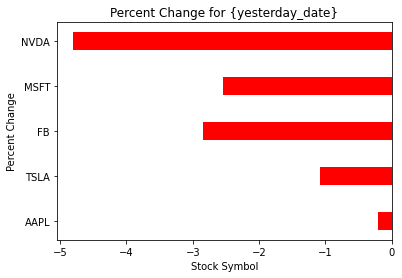

In [207]:
# create a horizontal bar chart that shows the percent change for each of the stocks to see which did the best
plt.barh(stock_symbol, height = 0.4, width = percent_change, color = 'r')
# annotate the chart
plt.title('Percent Change for {yesterday_date}')
plt.xlabel('Stock Symbol')
plt.ylabel('Percent Change')

# show the chart
plt.show()

In [208]:
# create a list to hold the stock_dict for each day
daily_stock_info = [{'symbol': ['AAPL', 'TSLA', 'FB', 'MSFT', 'NVDA'],
  'open': [168.71, 980.4, 218.42, 291.79, 222.14],
  'close': [165.75, 975.93, 216.46, 285.26, 219.17],
  'percent change': [-1.7858220211161437,
   -0.45802465340752174,
   -0.9054790723459204,
   -2.289139732174167,
   -1.3551124697723225]}]
# create a list to hold the date for each day
days = ['2022-04-11']

In [209]:
daily_stock_info.append(stock_dict)
days.append(date)

daily_dict = {k:v for k,v in zip(days,daily_stock_info)}

In [210]:
daily_dict

{'2022-04-11': {'symbol': ['AAPL', 'TSLA', 'FB', 'MSFT', 'NVDA'],
  'open': [168.71, 980.4, 218.42, 291.79, 222.14],
  'close': [165.75, 975.93, 216.46, 285.26, 219.17],
  'percent change': [-1.7858220211161437,
   -0.45802465340752174,
   -0.9054790723459204,
   -2.289139732174167,
   -1.3551124697723225]},
 '2022-04-12': {'symbol': ['AAPL', 'TSLA', 'FB', 'MSFT', 'NVDA'],
  'open': [168.02, 997.64, 220.235, 289.235, 225.37],
  'close': [167.66, 986.95, 214.14, 282.06, 215.04],
  'percent change': [-0.2147202672074518,
   -1.0831349105831036,
   -2.846268796114704,
   -2.5437850102815043,
   -4.803757440476197]}}

In [211]:
date

'2022-04-12'